# Лабораторная работа 3.4.5
### Сидорчук Максим Б01-304

In [43]:
# %load ../scripts/python_lib.py
#!/usr/bin/env python3

import sys
import os
import numpy as np
import subprocess
import pandas as pd
import pyperclip
import math
import matplotlib.pyplot as plt

#write_as_column - outputs as table column
#vertical=True - outputs a transponded version
#vertical=False - outputs a non transponded version
#if total_rows > amount of resulting rows then add empty elements
#if total_columns > amount of resulting columns then add empty columns

def arr_to_tex (arr:np.ndarray, outfile:str = '/dev/null', append:bool = False, to_clip:bool = False, precision=2, as_column:bool=False, vertical:bool=False, header:bool=True, col_total:int=0, row_total:int=0, caption:str = ''):
    tex_out =''
    if (header):
        tex_out += '\n\\begin{table}[H]\n\\caption{' + caption + '}\n\\begin{center}\n\\begin{tabular}{|c|*{15}{c|}}\\hline\n'

    if (arr.ndim == 1):
        for i in arr:
            if (isinstance (i, str)): tex_out += i
            else: tex_out += str (round (i, precision))
            tex_out += ' & '
            if (as_column): tex_out += '\n'
        if (as_column): tex_out += ' & \n' * max (0, row_total - len (arr))
        else: tex_out = tex_out[:-3] +  ' & ' * max (0, col_total - len (arr)) + '\\\\\\hline\n'
    elif (arr.ndim == 2):
        if (vertical):
            row_n = arr.shape[0]
            col_n = arr.shape[1]
            for i in range (row_n):
                for j in range (col_n):
                    if (isinstance (arr[j][i], str)): tex_out += arr[j][i]
                    else: tex_out += str (round (arr[j][i], precision))
                    tex_out += ' & '
                tex_out = tex_out[:-3] +  ' & ' * max (0, col_total - col_n) + '\\\\\\hline\n'
            tex_out += (' & ' * col_total + '\\\\\\hline\n') * row_total
        else:
            row_n = arr.shape[1]
            col_n = arr.shape[0]
            for i in arr:
                for j in i:
                    if (isinstance (j, str)): tex_out += j
                    else: tex_out += str (round (j, precision))
                    tex_out += ' & '
                tex_out = tex_out[:-3] +  ' & ' * max (0, col_total - col_n) + '\\\\\\hline\n'
            tex_out += (' & ' * col_total + '\\\\\\hline\n') * row_total

    if (header): tex_out += '\\end{tabular}\n\\end{center}\n\\end{table}\n\n'

    if (to_clip):
        clip_content = ''
        if (append): clip_content = pyperclip.paste ()
        clip_content += tex_out
        pyperclip.copy (clip_content)

    open_str = 'w'
    if (append): open_str = 'a'

    with open (outfile, open_str) as output:
        print (tex_out, file = output)


In [44]:
R_0 = 1 # Ohm,
R_u = 20*10**3 #Ohm,
C_u = 20 * 10**-6 #Farads
# this is with n0 shortcircuited
i_eff = 3.618 #Amps
x_amp = 4.8 * 2 #Divisions (length of horizontal line on osciligraph)

Kx = 2 * R_0 * np.sqrt (2) * i_eff / x_amp
Kx_set = 1
coef = Kx / Kx_set
coef

np.float64(1.0659634726387204)

/tmp/ipykernel_3710/89413248.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend ()


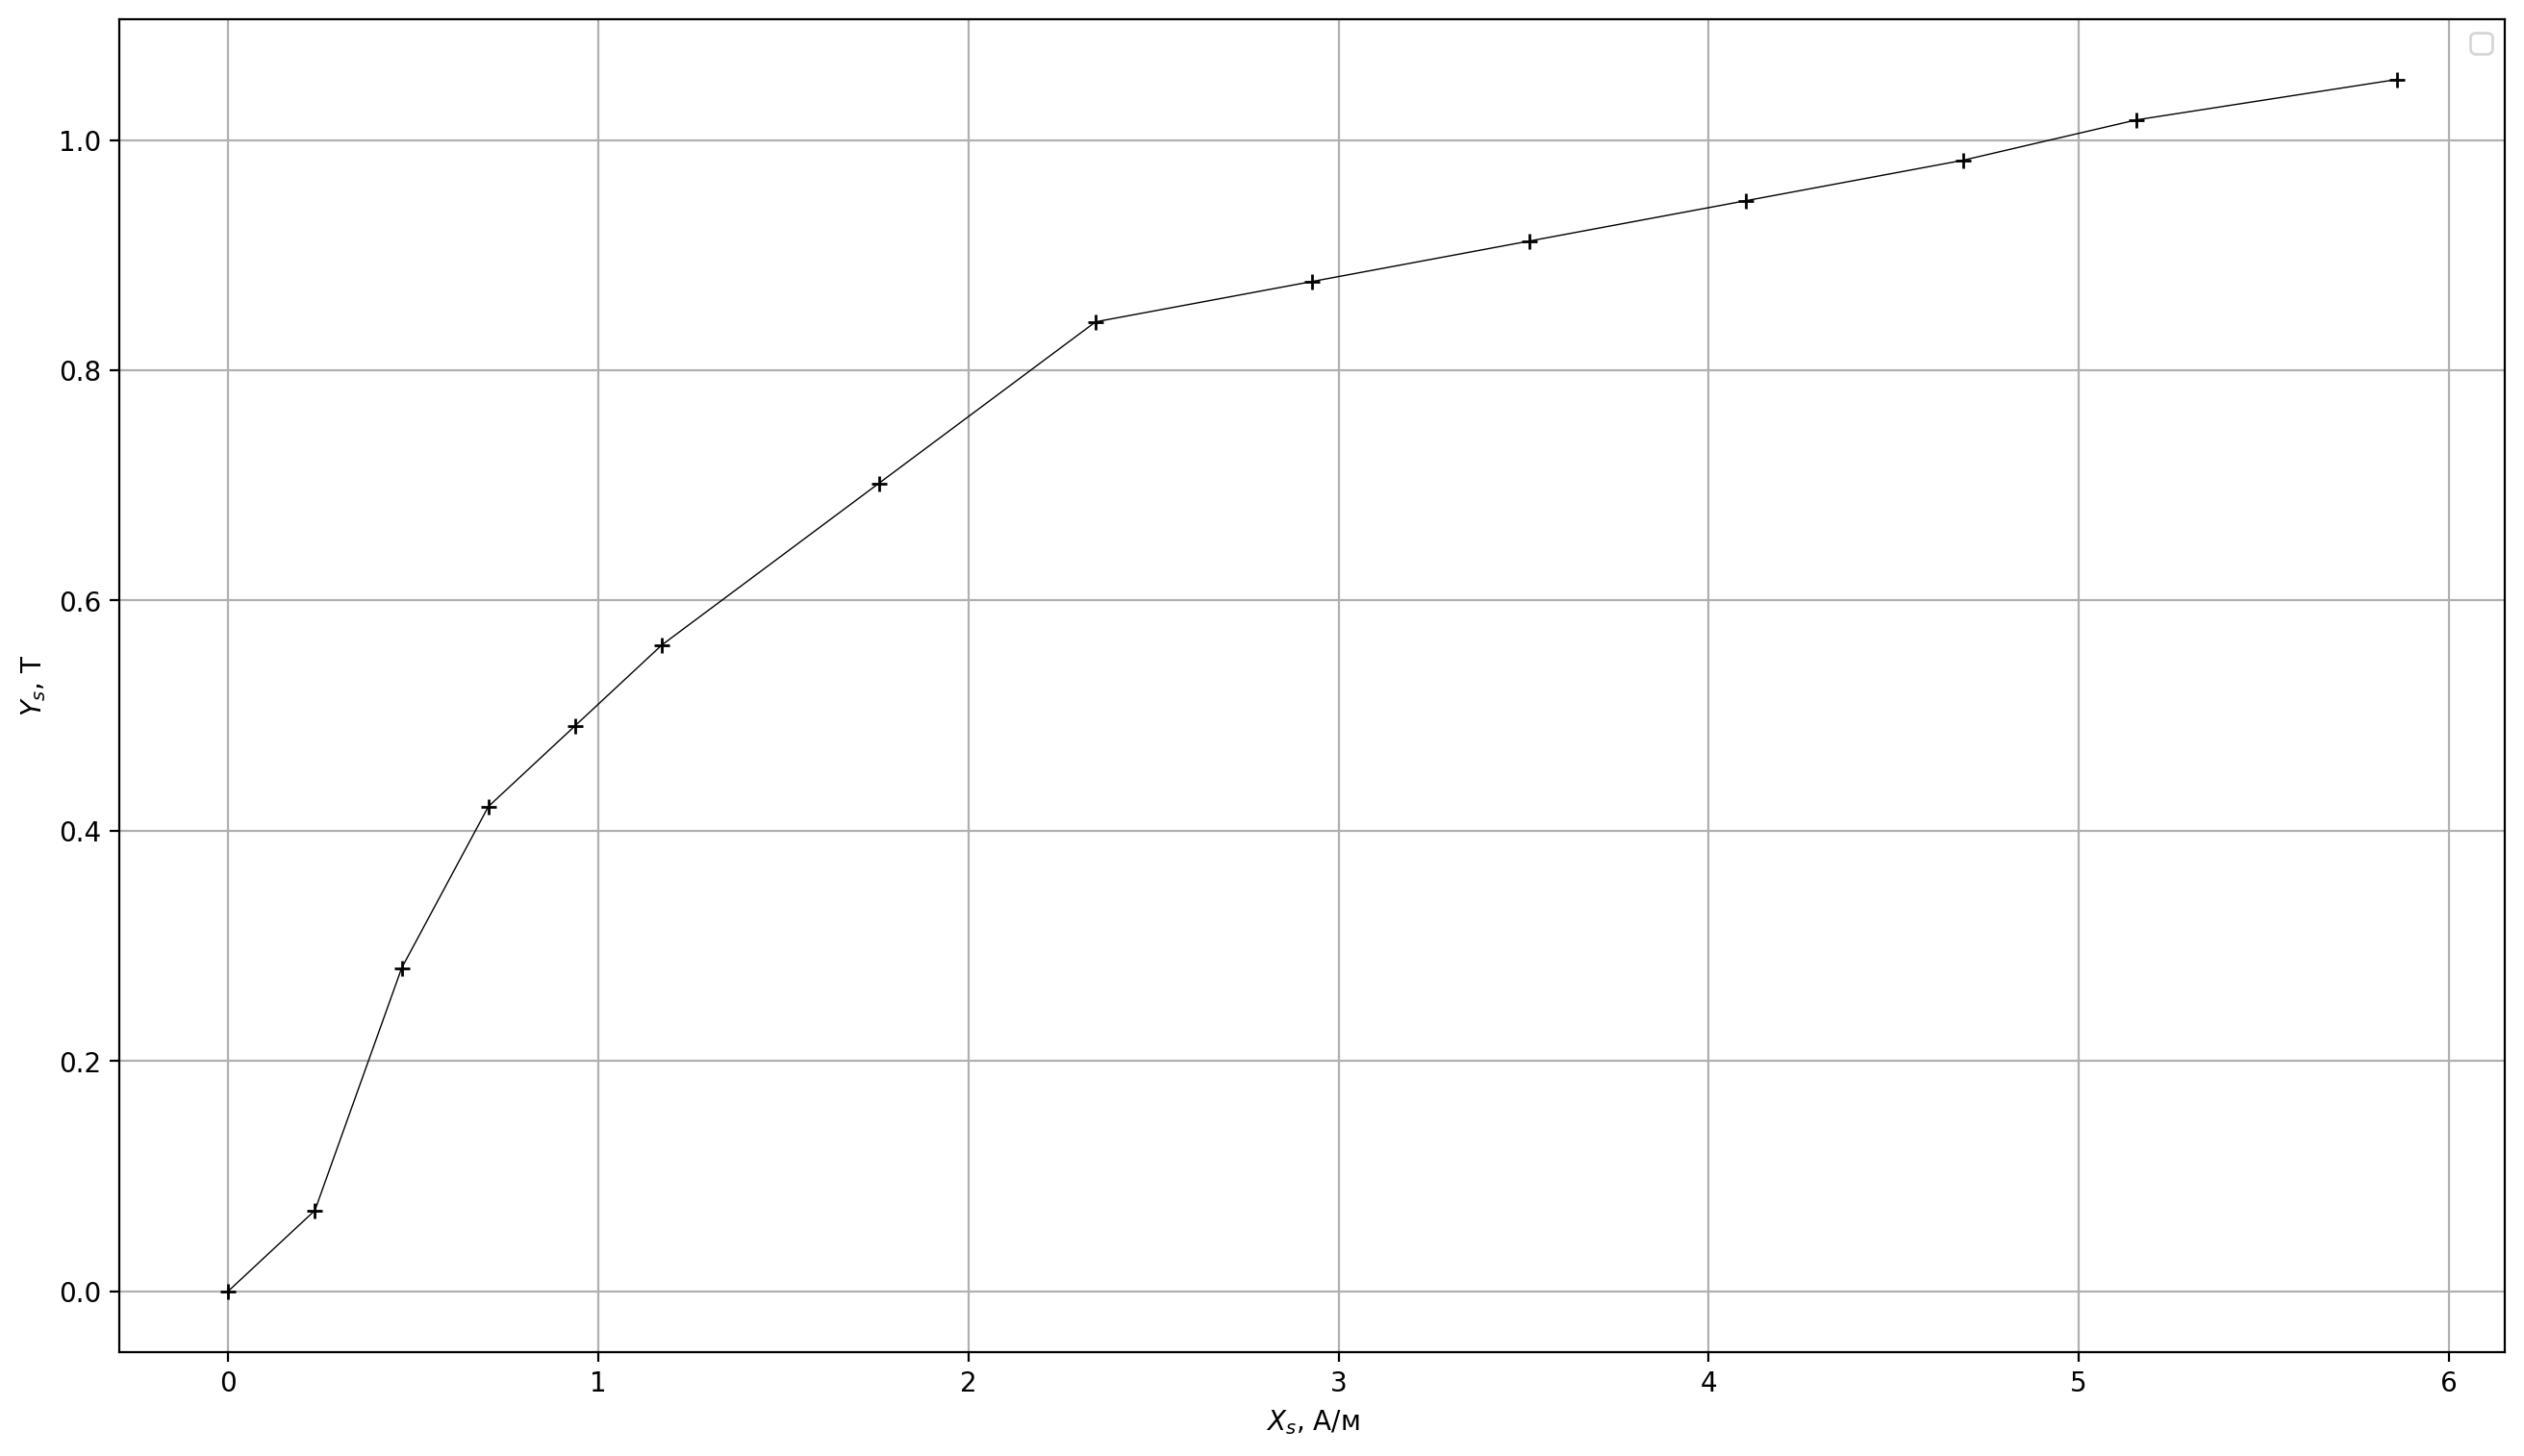

(1.171875,
 0.350877192982456,
 0.9375,
 0.8421052631578944,
 np.float64(0.04990253411306059),
 np.float64(0.8982456140350874))

In [45]:
#silicon iron
# FIRST COIL

n0 = 75
nu = 400
S = 2.85 * 10 **-4
rl = 12.8

x_s = 5 + 5
y_s = 3.1 + 3.2

x_c = 0.4 + 0.4
y_r = 1.2 + 1.2

k_x = 0.2
k_y = 0.1

# This is amp, not double amp as previous measurements
x = [5, 4.4, 4,   3.5, 3,   2.5, 2,   1.5, 1,   0.8, 0.6, 0.4, 0.2, 0]
y = [3, 2.9, 2.8, 2.7, 2.6, 2.5, 2.4, 2,   1.6, 1.4, 1.2, 0.8, 0.2, 0]


# arr_to_tex (np.array ([x, y]), to_clip=True)


plt.figure (figsize = (16, 9), dpi = 200)

plt.grid ()

H = (k_x * n0) / (rl * R_0)
B = (k_y * R_u * C_u) / (S * nu)
h = np.array(x) * H
b = np.array (y) * B
plt.xlabel (r'$X_s$, A/м')
plt.ylabel (r'$Y_s$, T')
plt.plot (h, b, color = 'black', linestyle = '-', marker = '+', linewidth = 0.5, markersize = 6)

plt.legend ()

plt.savefig ('pics/graph1.png')
plt.show ()
u_min = 10**30
u_max = 0
for i in range (len(h) - 1):
    u = (b[i+1] - b[i]) / (h[i+1] - h[i])
    u_min = min (u, u_min)
    u_max = max (u, u_max)

H, B, H * x_c, B * y_r, u_min, u_max

/tmp/ipykernel_3710/2115507904.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend ()


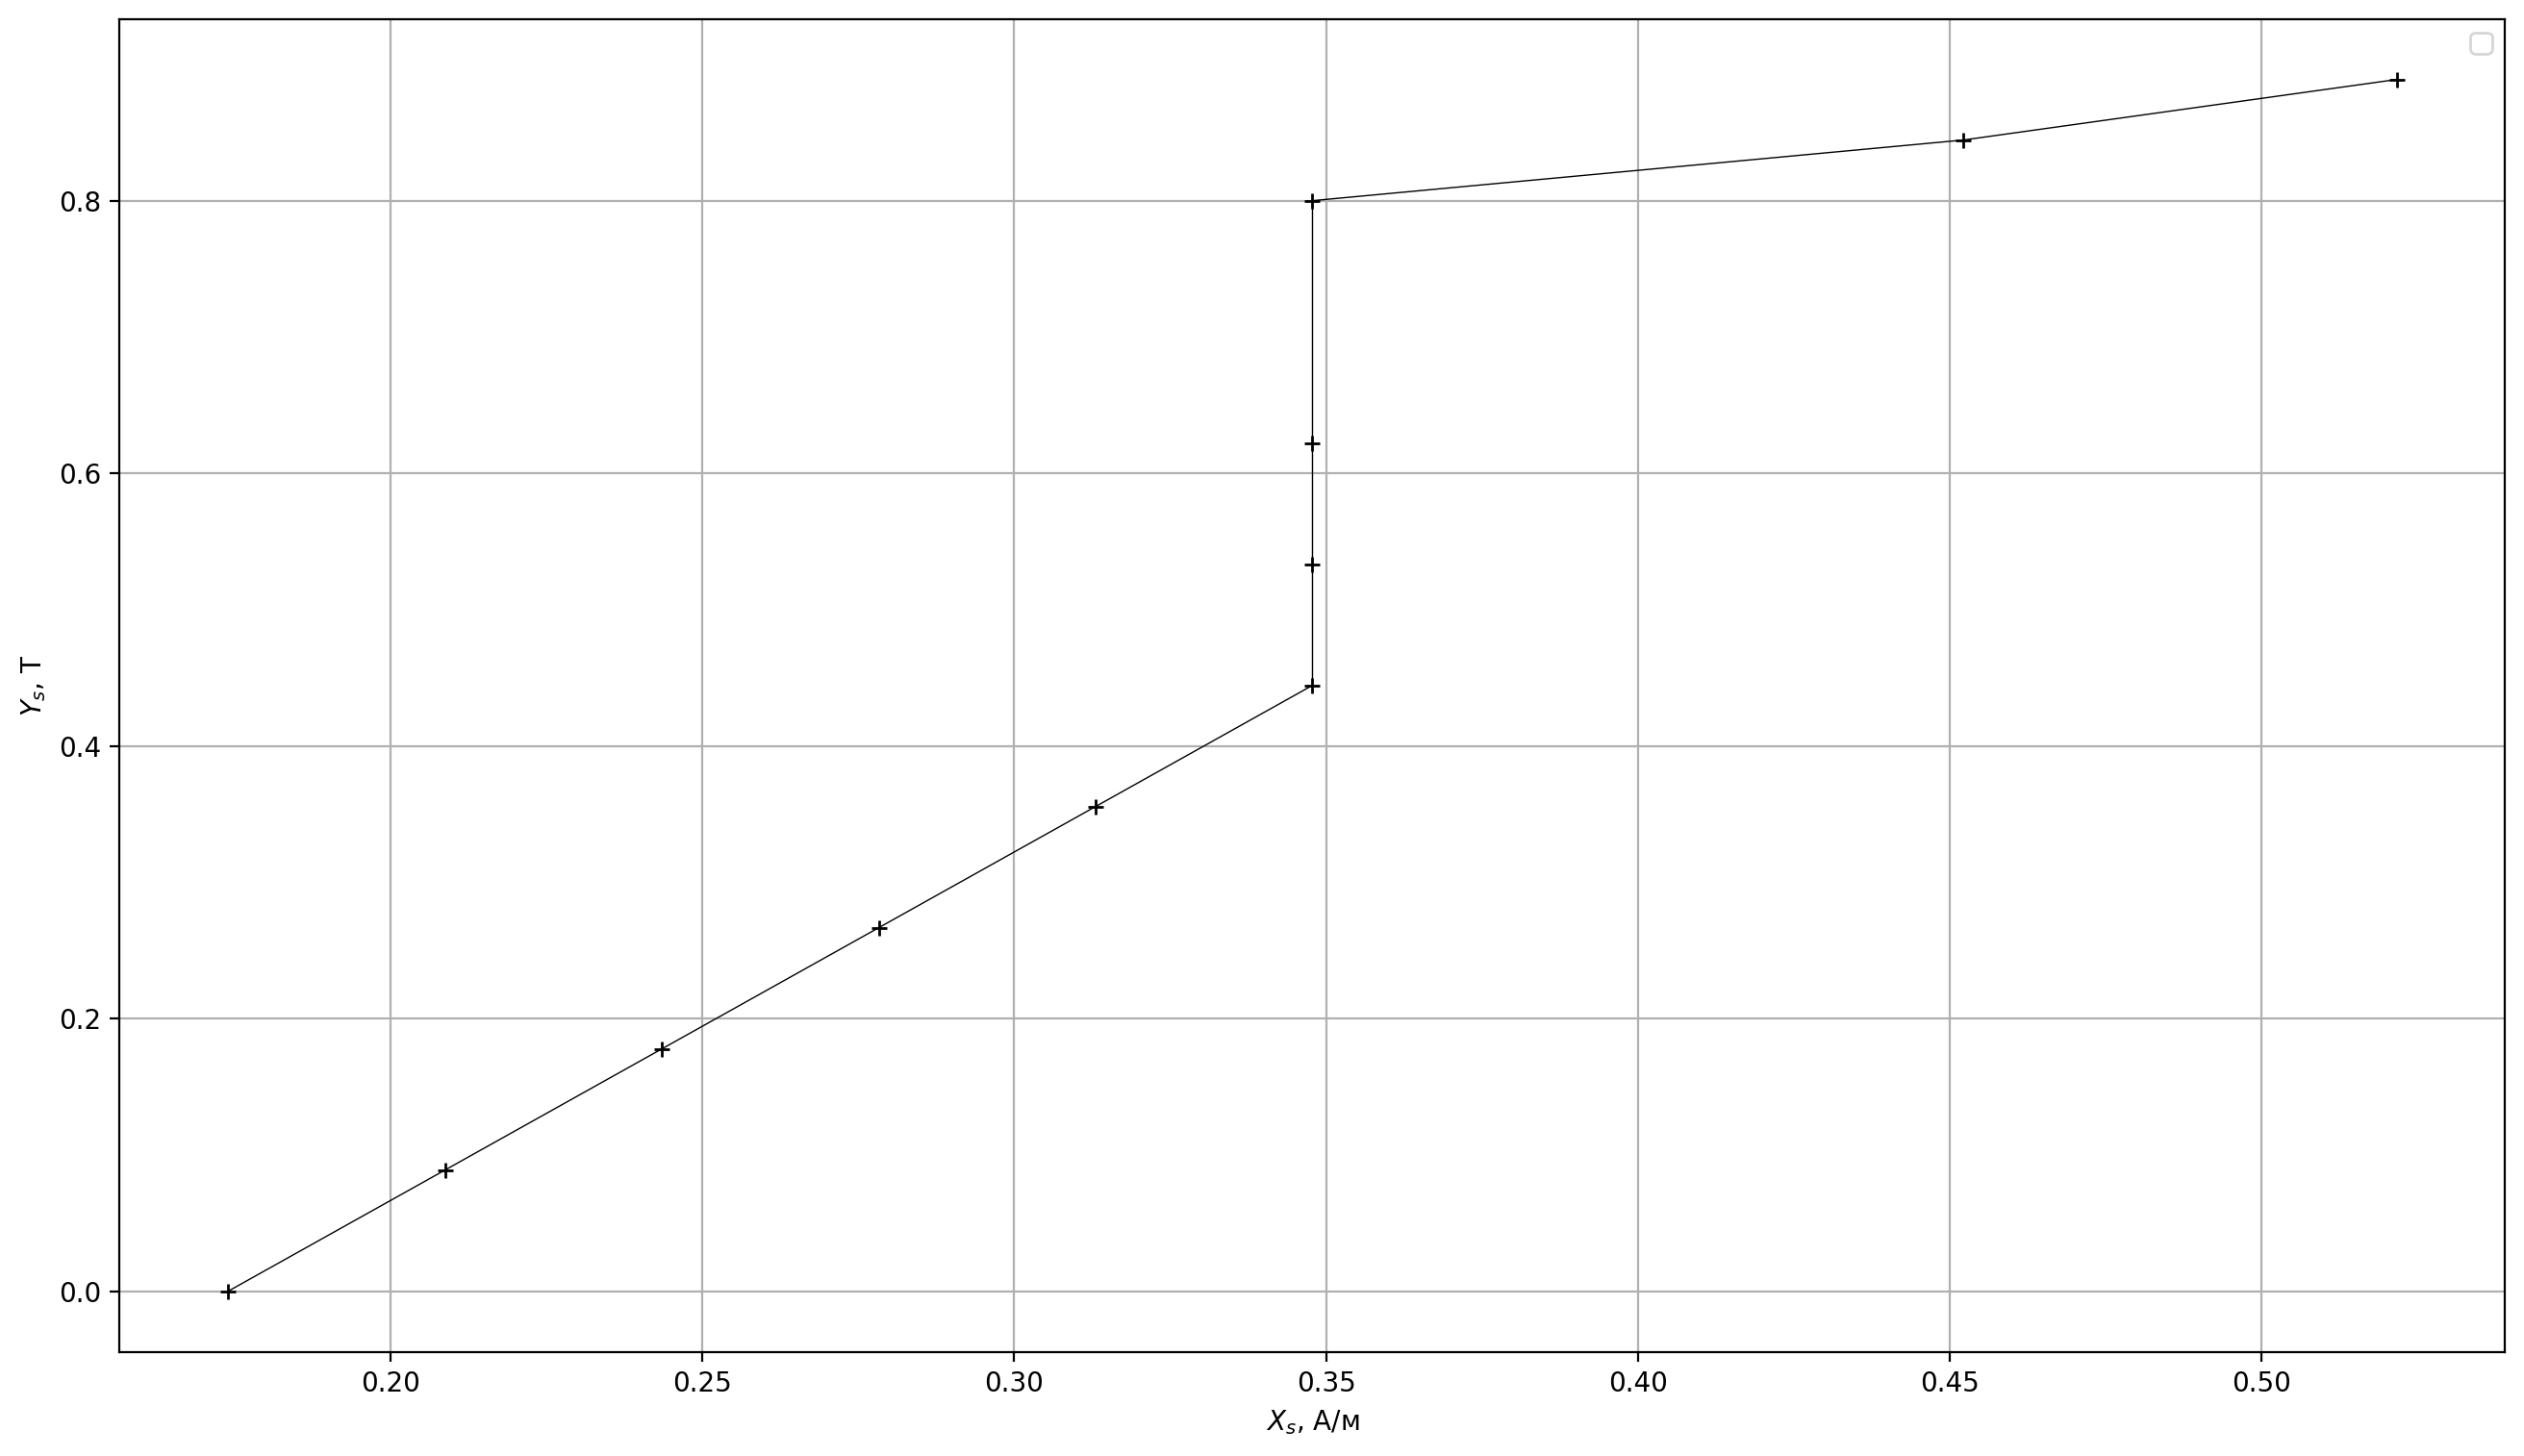

/tmp/ipykernel_3710/2115507904.py:43: RuntimeWarning: divide by zero encountered in scalar divide
  u = (b[i+1] - b[i]) / (h[i+1] - h[i])


(0.17391304347826086,
 0.4444444444444443,
 0.6260869565217392,
 1.6888888888888882,
 np.float64(0.4259259259259244),
 np.float64(2.555555555555557))

In [51]:
# SECOND COIL
    # permalloy

n0 = 40
nu = 200
S = 4.5 * 10**-4
rl = 23


x_s = 3.8+3.8
y_s = 2 + 2

x_c = 1.8 + 1.8
y_r = 1.9 + 1.9

k_x = 0.1
k_y = 0.1

x = [3, 2.6, 2,   2,   2,   2, 1.8, 1.6, 1.4, 1.2, 1]
y = [2, 1.9, 1.8, 1.4, 1.2, 1, 0.8, 0.6, 0.4, 0.2, 0]

arr_to_tex (np.array ([['$x$'] + x, ['$y$'] + y]), to_clip=True, caption='Начальная кривая намагничивания пермаллоя')

plt.figure (figsize = (16, 9), dpi = 200)

plt.grid ()

H = (k_x * n0) / (rl * R_0)
B = (k_y * R_u * C_u) / (S * nu)
h = np.array(x) * H
b = np.array (y) * B
plt.xlabel (r'$X_s$, A/м')
plt.ylabel (r'$Y_s$, T')
plt.plot (h, b, color = 'black', linestyle = '-', marker = '+', linewidth = 0.5, markersize = 6)
plt.legend ()

plt.savefig ('pics/graph2.png')
plt.show ()

u_min = 10**30
u_max = 0
for i in range (len(h) - 1):
    u = (b[i+1] - b[i]) / (h[i+1] - h[i])
    u_min = min (abs(u), u_min)
    u_max = max (u, u_max)

H, B, H * x_c, B * y_r, u_min, u_max

/tmp/ipykernel_3710/95660489.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend ()


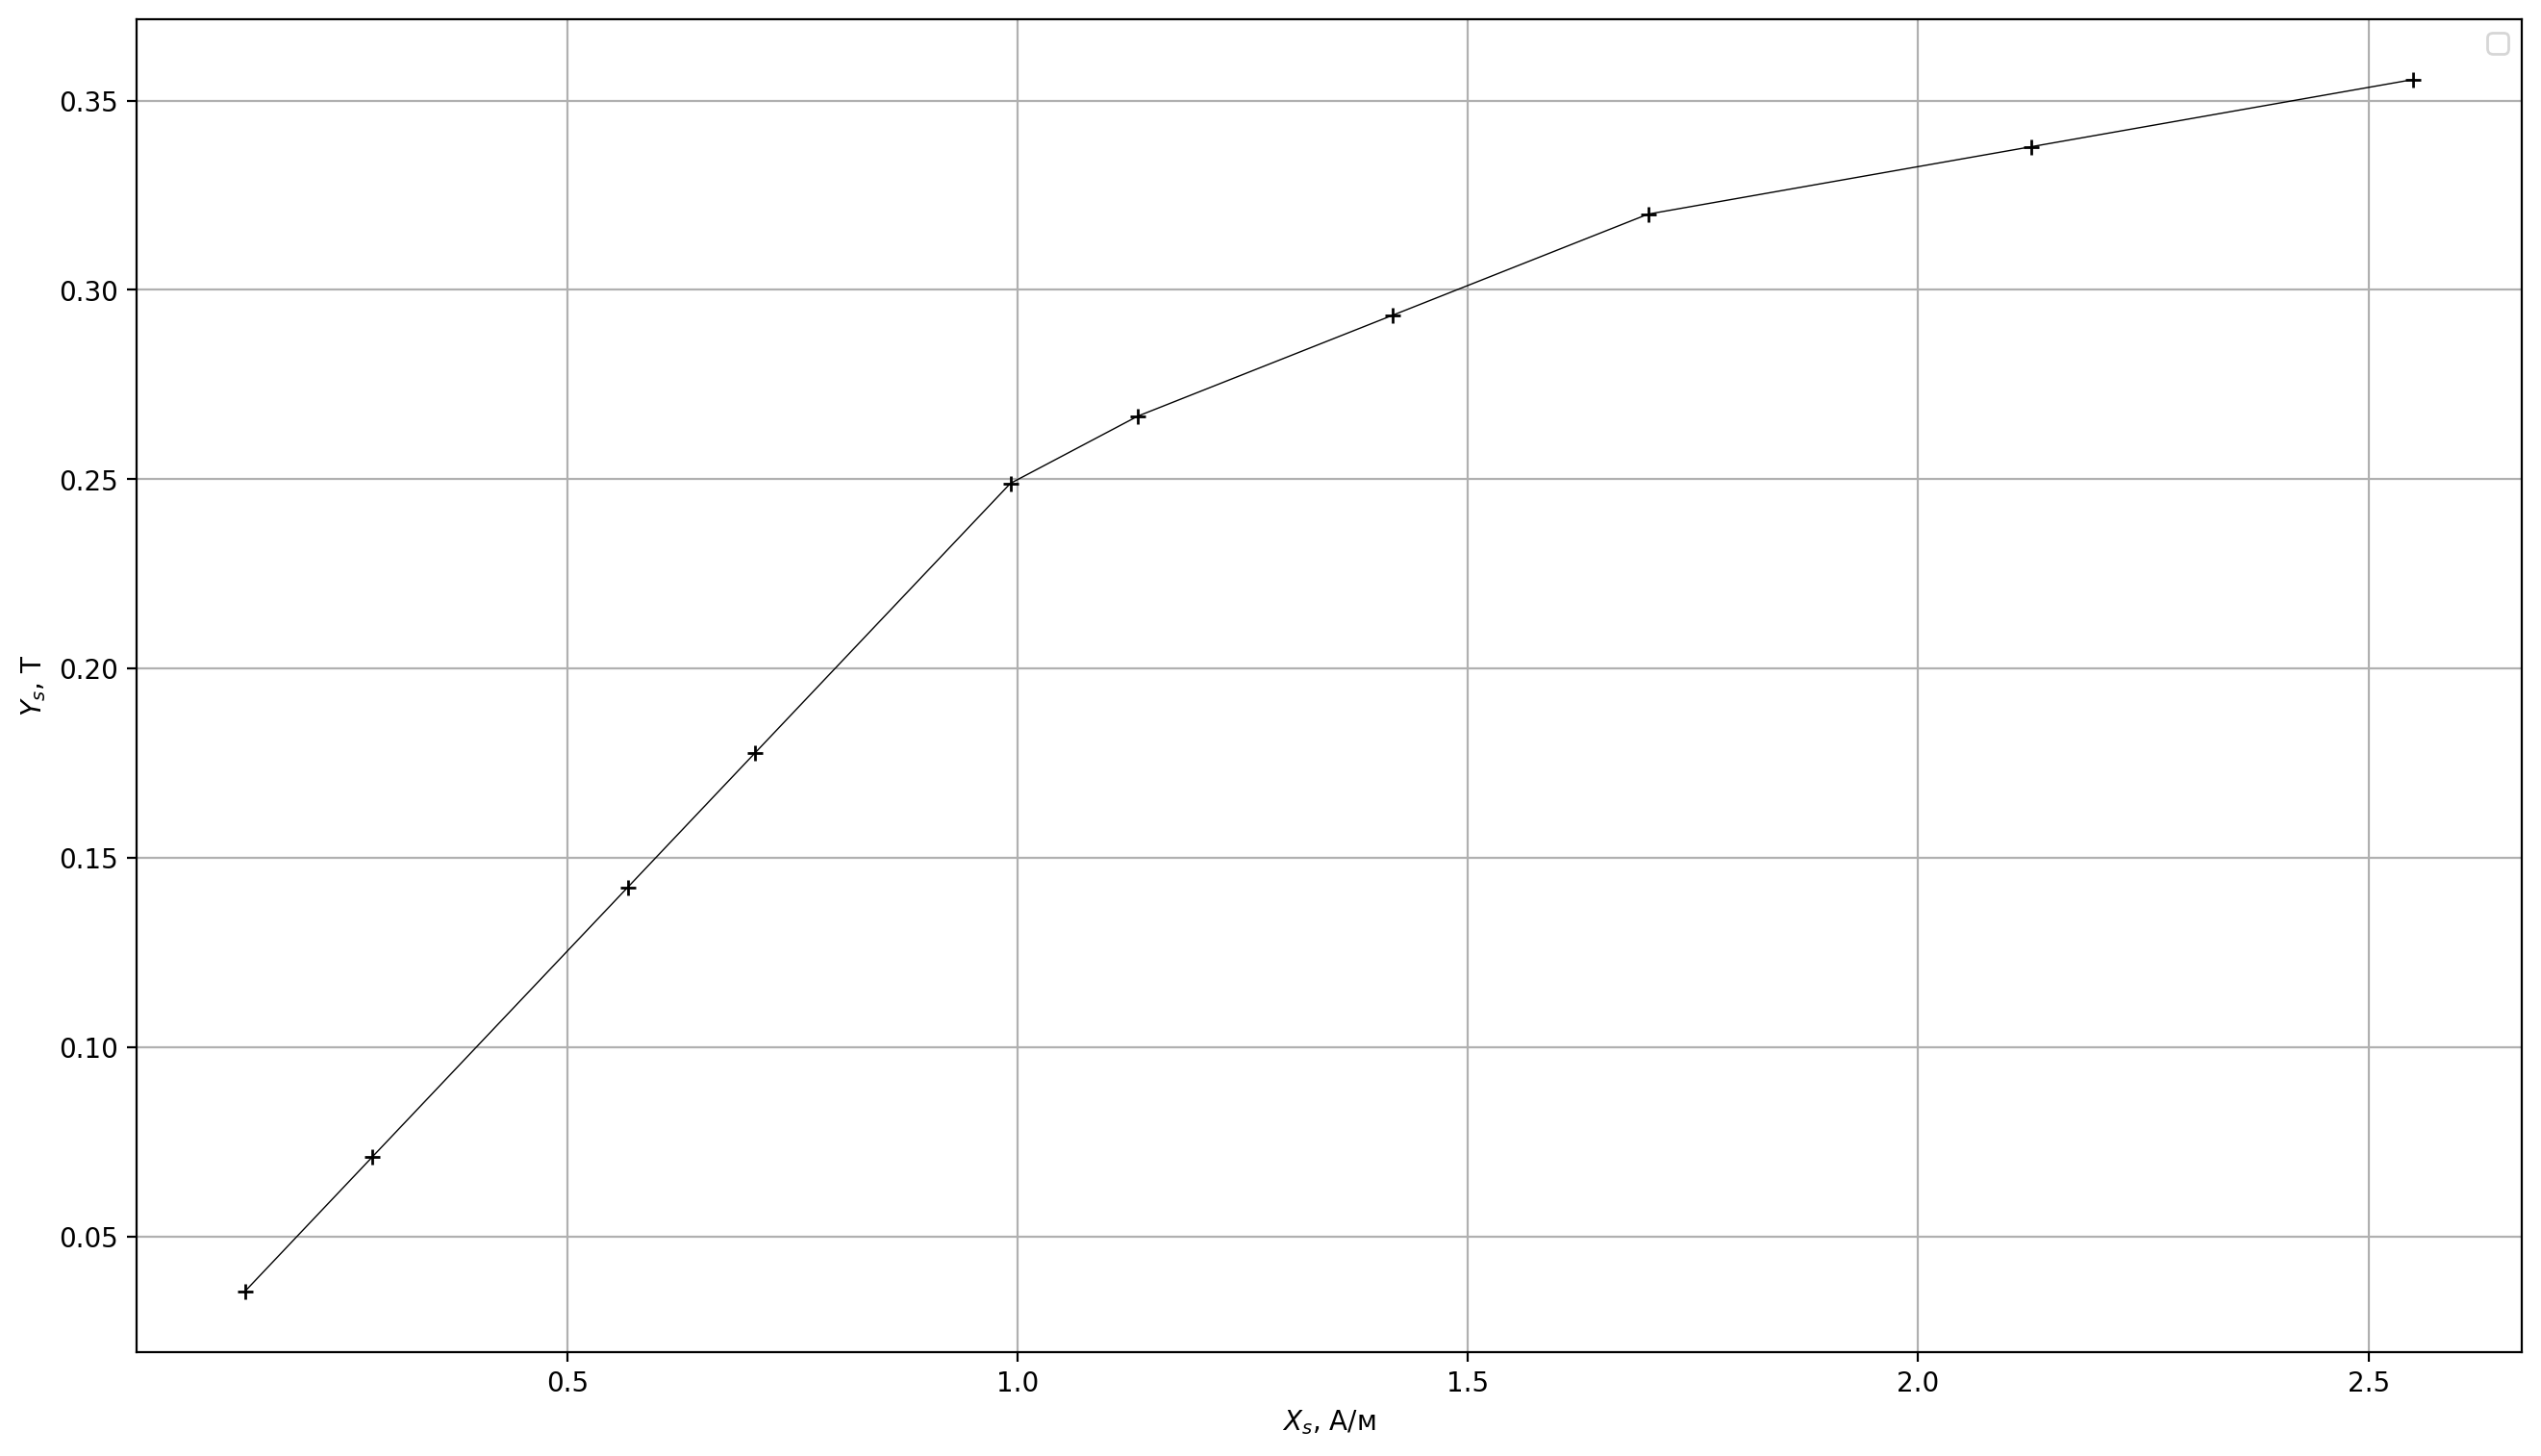

(1.7708333333333333,
 0.22222222222222215,
 0.7083333333333334,
 0.4444444444444443,
 np.float64(0.04183006535947711),
 np.float64(0.2509803921568627))

In [47]:
# THIRD COIL
#ferrit

# from now on x and y are assumed to be TOTAL width of the curve in division (big cells on oscilograph)

# x and y will be calculated as summ of above zero + below zero

n0 = 85
nu = 300
S = 3 * 10**-4
rl = 24

x_s = 2.8 + 2.6
y_s = 2 + 2

x_c = 0.2 + 0.2
y_r = 1 + 1

k_x = 0.5
k_y = 0.05

k_y_1= 0.02 #for this arrays
k_x_1=0.2 #for this arrays
x = [3.6, 3,   2.4, 2,   1.6, 1.4, 1, 0.8, 0.4, 0.2]
y = [4,   3.8, 3.6, 3.3, 3,   2.8, 2, 1.6, 0.8, 0.4]

arr_to_tex (np.array ([['$x$'] + x, ['$y$'] + y]), to_clip=True, caption='Начальная кривая намагничивания феррита')

plt.figure (figsize = (16, 9), dpi = 200)

plt.grid ()

H = (k_x_1 * n0) / (rl * R_0)
B = (k_y_1 * R_u * C_u) / (S * nu)
h = np.array(x) * H
b = np.array (y) * B
plt.xlabel (r'$X_s$, A/м')
plt.ylabel (r'$Y_s$, T')
plt.plot (h, b, color = 'black', linestyle = '-', marker = '+', linewidth = 0.5, markersize = 6)
plt.legend ()

plt.savefig ('pics/graph3.png')
plt.show ()

H = (k_x * n0) / (rl * R_0)
B = (k_y * R_u * C_u) / (S * nu)
u_min = 10**30
u_max = 0
for i in range (len(h) - 1):
    u = (b[i+1] - b[i]) / (h[i+1] - h[i])
    u_min = min (u, u_min)
    u_max = max (u, u_max)

H, B, H * x_c, B * y_r, u_min, u_max

In [48]:
# Measurement of rc-circuit parameters
# For this purpose we get 6.3 volts in and output to oscilograph

ky = 2
U_in = ky * 2 * 4

ky1 = 0.02
U_out = ky1 * (3.2 + 3.1)
w = 50 * 2 * np.pi # 50Hz * 2pi
tau = U_in / (w * U_out)
tau

tau_theor = R_u * C_u
# Almost equal
U_in, U_out, tau_theor, tau

(16, 0.12600000000000003, 0.39999999999999997, 0.40420303007465475)